In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

c:\Users\sayed\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown \n**Please cite**: \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field. \n\nWith some classification methods (particularly template-based methods, such as SVM and K-nearest neighbors), the error rate improves when the digits are centered by bounding box rather than center of mass. If you do this kind of pre-processing, you should report it in your publications. The MNIST database was constructed from NIST's NIST originally designated SD-3 as their training set and SD-1 as their test set. However, SD-3 is much cleaner and easier to recognize than SD-1. The reason for this can be found on the fact that SD-3 was collected among Census Bureau employees, while SD-1 was collected among high-school students. Drawing sensible conclusions from learning experiments requires that the result be independent of the choice of training set and test among the complete set of samples. Therefore it was necessary to build a new database by mixing NIST's datasets. \n\nThe MNIST training set is composed of 30,000 patterns from SD-3 and 30,000 patterns from SD-1. Our test set was composed of 5,000 patterns from SD-3 and 5,000 patterns from SD-1. The 60,000 pattern training set contained examples from approximately 250 writers. We made sure that the sets of writers of the training set and test set were disjoint. SD-1 contains 58,527 digit images written by 500 different writers. In contrast to SD-3, where blocks of data from each writer appeared in sequence, the data in SD-1 is scrambled. Writer identities for SD-1 is available and we used this information to unscramble the writers. We then split SD-1 in two: characters written by the first 250 writers went into our new training set. The remaining 250 writers were placed in our test set. Thus we had two sets with nearly 30,000 examples each. The new training set was completed with enough examples from SD-3, starting at pattern # 0, to make a full set of 60,000 training patterns. Similarly, the new test set was completed with SD-3 examples starting at pattern # 35,000 to make a full set with 60,000 test patterns. Only a subset of 10,000 test images (5,000 from SD-1 and 5,000 from SD-3) is available on this site. The full 60,000 sample training set is available.\n\nDownloaded from openml.org."


In [4]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
for i in [mnist.data, mnist.target]:
    print(i.shape)

(70000, 784)
(70000,)


In [3]:
X, y = mnist.data, mnist.target

In [34]:
import matplotlib.pyplot as plt

In [33]:
def show_image(image):
    image = image.reshape((28, 28))
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.show()


show_image(X[0])
print('The True label is:', y[0])

NameError: name 'plt' is not defined

In [4]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training Binary Classifier


In [5]:
y5 = (y_train == '5')
y5test = (y_test == '5')

In [6]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=32)
sgd.fit(x_train, y5)

SGDClassifier(random_state=32)

In [13]:
print('Test image of', y_test[:9])
print('Prediction', sgd.predict(x_test[:9]))

Test image of ['7' '2' '1' '0' '4' '1' '4' '9' '5']
Prediction [False False False False False False False False False]


In [14]:
from sklearn.model_selection import cross_val_score
cval = cross_val_score(sgd, x_train, y5, cv=3, scoring='accuracy', n_jobs=-1)
cval

array([0.95175, 0.9636 , 0.952  ])

In [15]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(x_train, y5)

DummyClassifier()

In [16]:
print(any(dummy.predict(x_train)))

False


In [17]:
crval = cross_val_score(dummy, x_train, y5, scoring='accuracy', cv=3)
crval

array([0.90965, 0.90965, 0.90965])

this indicates that **accuracy** not the best measure of performance for classifier, especially when the dataset is **skewed**


implementation for cross validation


In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [19]:
stra = StratifiedKFold(n_splits=3)

for i, (train_indices, test_indices) in enumerate(stra.split(x_train, y5)):
    print('Fold', i)
    print(train_indices[:14], '\n', test_indices[:14])
    print(train_indices.shape, test_indices.shape)

    x_train_folds, y_train_folds = x_train[train_indices], y5[train_indices]
    x_test_folds, y_test_folds = x_train[test_indices], y5[test_indices]

    sgd_clone = clone(sgd)
    sgd_clone.fit(x_train_folds, y_train_folds)
    preds = sgd_clone.predict(x_test_folds)

    correct = sum(preds == y_test_folds)
    print(f'Fold {i} accuracy: ', correct/len(preds))

Fold 0
[19964 19965 19966 19967 19968 19969 19970 19971 19972 19974 19975 19976
 19977 19978] 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
(40000,) (20000,)
Fold 0 accuracy:  0.95175
Fold 1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] 
 [19964 19965 19966 19967 19968 19969 19970 19971 19972 19974 19975 19976
 19977 19978]
(40000,) (20000,)
Fold 1 accuracy:  0.9636
Fold 2
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] 
 [39988 39989 39990 39991 39992 39993 39994 39995 39997 39998 40000 40001
 40002 40003]
(40000,) (20000,)
Fold 2 accuracy:  0.952


### Confusion Matrix


predictions


In [20]:
from sklearn.model_selection import cross_val_predict

sgd = SGDClassifier(random_state=42)
predictions = cross_val_predict(sgd, x_train, y5, cv=3)

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y5, predictions)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [22]:
# pretend we build perfect model:
confusion_matrix(y5, y5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

$$\text{\color{Gold}Recall} = {\text{True Positive}\over{\text{True Positive} + \text{False Negative}}}$$

$$\text{\color{Gold}Precision} = {\text{True Positive}\over{\text{True Positive} + \text{False Positive}}}$$


In [23]:
from sklearn.metrics import recall_score, precision_score


print('Recall: ', recall_score(y5, predictions))
print('Precision: ', precision_score(y5, predictions))

Recall:  0.6511713705958311
Precision:  0.8370879772350012


In [5]:
from sklearn.metrics import f1_score

# print('F1 Score: ', f1_score(y5, predictions))

try move classifier threshold


In [25]:
sgd.fit(x_train, y5)

SGDClassifier(random_state=42)

In [26]:
y_scores = sgd.decision_function(x_train[:9])
y_scores

array([  2164.22030239,  -5897.37359354, -13489.14805779,  -4623.84515943,
        -6873.05248453,  -3908.27576291,  -4851.9422397 ,  -4988.52407755,
        -2226.78132866])

In [27]:
threshold = 0

sum(y_scores > threshold)

1

In [28]:
threshold = 3000

sum(y_scores > threshold)

0

This confirms that raising the threshold decreases recall


Cross Validation Predict


In [67]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(
    sgd, x_train, y5, cv=3, method='decision_function')

In [32]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt

precision, recall, thresholds = precision_recall_curve(y5, y_scores)

In [36]:
print(precision.shape)
print(recall.shape)
print(thresholds.shape)

(60001,)
(60001,)
(60000,)


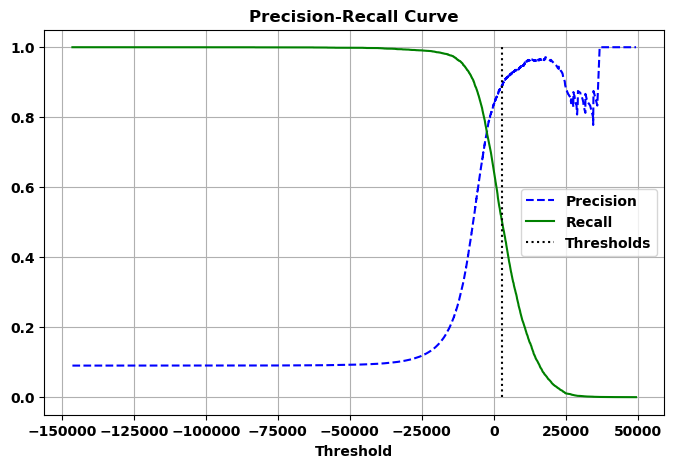

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label='Thresholds')
plt.xlabel('Threshold')
plt.grid()
plt.legend()
plt.show()

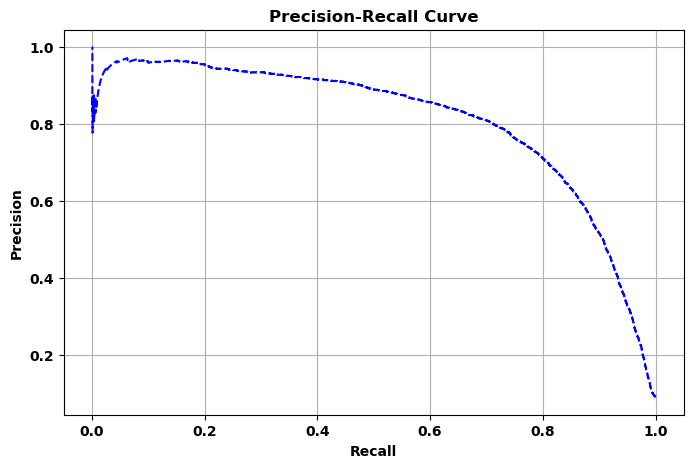

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(recall[:-1], precision[:-1], 'r-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

In [60]:
idx_for_90_precision = (precision > .9).argmax()
threshold_90_pr = thresholds[idx_for_90_precision]
threshold_90_pr

3370.0194991439594

In [70]:
y_train_pred_90_pr = (y_scores >= threshold_90_pr)
y_train_pred_90_pr

array([False, False, False, ...,  True, False, False])

In [71]:
precision_score(y5, y_train_pred_90_pr)

0.9000345901072293

In [72]:
recall_score(y5, y_train_pred_90_pr)

0.4799852425751706

ROC Curve


In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds_roc = roc_curve(y5, y_scores)

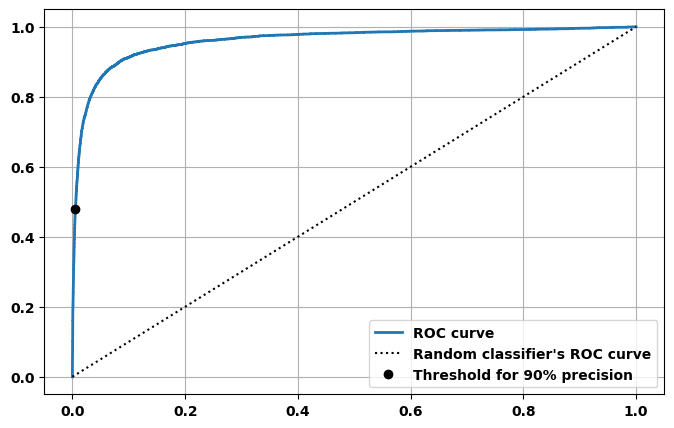

In [85]:
plt.figure(figsize=(8, 5))
idx_for_threshold_at_90 = (thresholds_roc <= threshold_90_pr).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.legend()
plt.grid()
plt.show()

In [86]:
roc_auc_score(y5, y_scores)

0.9604938554008616

Try Random Forest


In [87]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=32)

In [88]:
y_props_rf = cross_val_predict(rfc, x_train, y5, cv=3, method='predict_proba')

In [89]:
y_props_rf[:2]

array([[0.15, 0.85],
       [0.95, 0.05]])

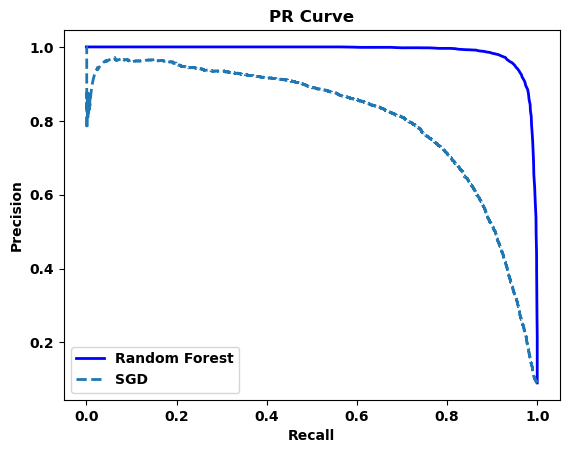

In [92]:
y_scores_rf = y_props_rf[:, 1]
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y5, y_scores_rf)

plt.plot(recall_rf, precision_rf, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recall, precision, "--", linewidth=2, label="SGD")
plt.title('PR Curve')
plt.xlabel("Recall")
plt.ylabel('Precision')
plt.legend()
plt.show()

In [95]:
y_preds_rf = y_scores_rf >= .5

print('f1 Score:', f1_score(y5, y_preds_rf))
print('AUC:', roc_auc_score(y5, y_scores_rf))

f1 Score: 0.9288997555012225
AUC: 0.9983814664059696


### MultiClass Classification


In [24]:
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(x_train[:2000], y_train[:2000])

SVC(random_state=42)

In [25]:
model.predict(x_train[:9])

array(['5', '0', '4', '1', '9', '2', '1', '3', '1'], dtype=object)

In [9]:
y_train[:9]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1'], dtype=object)

In [15]:
first_image_scores = model.decision_function(x_train[:1]).round(2)
first_image_scores

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [16]:
class_id = first_image_scores.argmax()
class_id

5

In [20]:
print('Classes: ', model.classes_)
print('Weights:', model.class_weight_)
print('Predicted Class: ', model.classes_[class_id])

Classes:  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Weights: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Predicted Class:  5


In [28]:
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(SVC(random_state=42))
model.fit(x_train[:2000], y_train[:2000])

model.predict(x_train[:10])

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype='<U1')

In [29]:
model.estimators_

[SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42)]

In [32]:
print("Number of SVC models:", len(model.estimators_))

Number of SVC models: 10


In [33]:
sgd_cl = SGDClassifier(random_state=42)
sgd_cl.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [34]:
sgd_cl.predict(x_train[:10])

array(['3', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype='<U1')

In [39]:
sgd_cl.decision_function(x_train[:1]).round(2)

array([[-31893.03, -34419.69,  -9530.64,   1823.73, -22320.15,  -1385.8 ,
        -26188.91, -16147.51,  -4604.35, -12050.77]])

In [41]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(sgd_cl, x_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

array([0.87365, 0.85835, 0.8689 ])

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(float))

cross_val_score(sgd_cl, x_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

### Error Analysis


In [45]:
y_train_pred = cross_val_predict(
    sgd_cl, x_train_scaled, y_train, cv=3, n_jobs=-1)

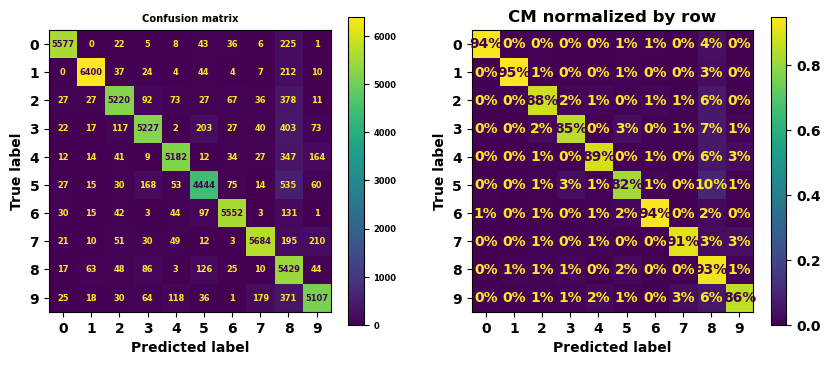

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.rc('font', size=6)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

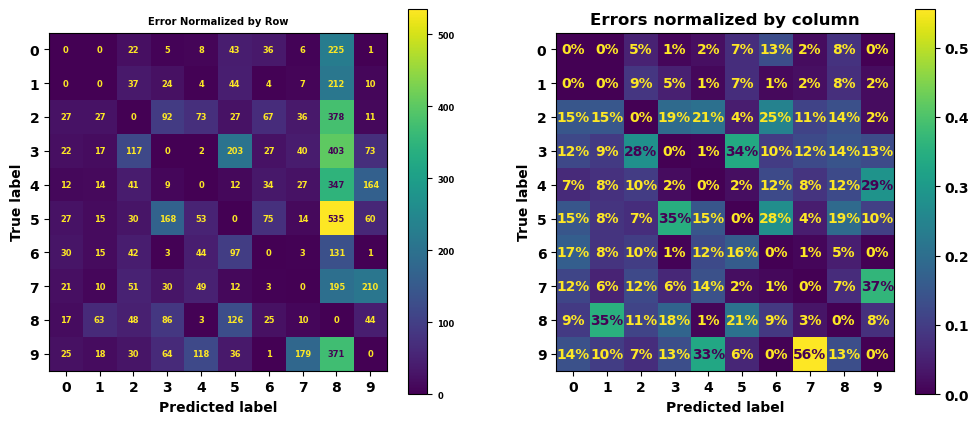

In [55]:
sample_weight = (y_train_pred != y_train)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.rc('font', size=6)
ConfusionMatrixDisplay.from_predictions(
    y_train, y_train_pred, ax=axs[0], sample_weight=sample_weight)
axs[0].set_title("Error Normalized by Row")

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="pred", values_format=".0%",
                                        sample_weight=sample_weight)
axs[1].set_title("Errors normalized by column")
plt.show()

more error analysis on classes 3 & 5


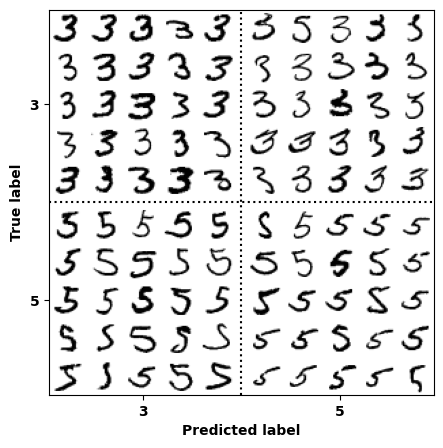

In [57]:
cl_a, cl_b = '3', '5'

x_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
x_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]

size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(x_ba, (0, 0)), (x_bb, (1, 0)),
                                       (x_aa, (0, 1)), (x_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### MultiLabel Classification


In [7]:
import numpy as np
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [9]:
y_train[:2]

array(['5', '0'], dtype=object)

In [8]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

In [12]:
y_test[:9]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5'], dtype=object)

In [24]:
multilabel_preds = knn_clf.predict(x_train)
multilabel_preds[:9]

array([[False,  True],
       [False, False],
       [False, False],
       [False,  True],
       [ True,  True],
       [False, False],
       [False,  True],
       [False,  True],
       [False,  True]])

In [25]:
y_multilabel.shape

(60000, 2)

In [26]:
multilabel_preds.shape

(60000, 2)

In [27]:
from sklearn.metrics import f1_score
f1score = f1_score(y_multilabel, multilabel_preds, average='macro')
f1score

0.9868583757824326

In [28]:
from sklearn.multioutput import ClassifierChain
from sklearn.svm import SVC

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(x_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [30]:
chain_clf.predict(x_train[:9])

array([[0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

### MultiOutput Classification


In [31]:
np.random.seed(42)
noise = np.random.randint(low=0, high=100, size=(len(x_train), 28*28))
x_train_modified = x_train + noise

noise = np.random.randint(low=0, high=100, size=(len(x_test), 28*28))
x_test_modified = x_test + noise

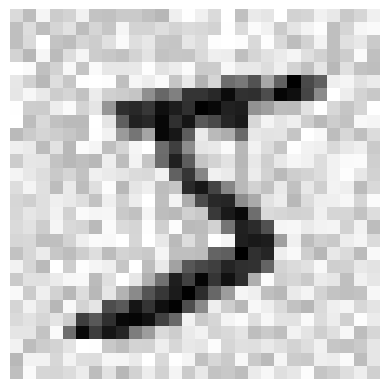

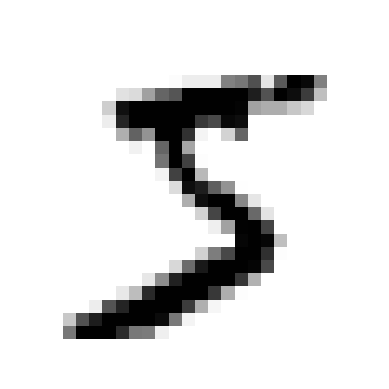

In [38]:
show_image(x_train_modified[0])
show_image(x_train[0])

In [39]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_modified, x_train)

KNeighborsClassifier()

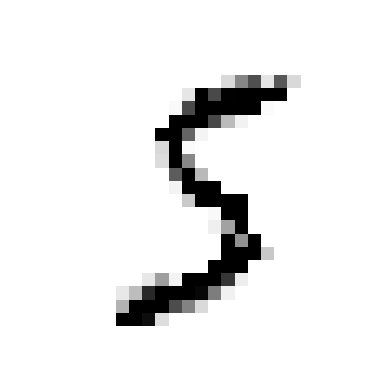

In [43]:
image = knn_clf.predict([x_train_modified[0]])
show_image(image)